In [1]:
# Generate data for key predictor variables assuming that we have daily sales data: 
# date, website clicks, number of orders, number of men shoes sold, 
# number of women shoes sold, number of kids shoes sold,  
# competitor sales, number of complaints, etc.

N <- 365 * 3 + 1
START <- as.Date('2016-01-01')
dates <- START + (0:(N - 1))

clicks <- round(rnorm(N, 500000, 5000))
n.men <- 500 + 1000 * rpois(N, 4)
n.women <- 500 + 1000 * rpois(N, 3)
n.kids <- 300 + 1000 * rpois(N, 1)
n.orders <- n.men + n.women + n.kids
comp.sales <- rnorm(N, 600000, 700)
n.emails <- 100 + 100 * rpois(N, 4)
n.complaints <- round((0.2 + rnorm(N, 0,0.01)) * n.emails)

sales <- (12000 + 50000*sin((2*pi/365)*as.numeric(dates)) + 1.3*clicks + 120*n.men + 110*n.women + 65*n.kids - 0.2*comp.sales 
          - 0.4*(n.complaints / n.emails)) + rnorm(N, 0, 100000)
data <- data.frame(
  sales=sales,date=dates, clicks=clicks, n.men=n.men, n.women=n.women, n.kids=n.kids, 
  n.orders=n.orders, comp.sales=comp.sales, n.emails=n.emails, n.complaints=n.complaints)

In [2]:
head(data)
tail(data)

sales,date,clicks,n.men,n.women,n.kids,n.orders,comp.sales,n.emails,n.complaints
1411457,2016-01-01,505214,2500,4500,300,7300,600359.4,1000,198
1942602,2016-01-02,495773,6500,4500,300,11300,599301.4,600,116
2094590,2016-01-03,503407,7500,4500,2300,14300,600340.4,400,76
1499818,2016-01-04,499704,4500,2500,1300,8300,600783.4,700,139
1433944,2016-01-05,498754,4500,2500,2300,9300,599510.5,600,116
1450610,2016-01-06,495787,3500,2500,3300,9300,600512.1,400,85


,sales,date,clicks,n.men,n.women,n.kids,n.orders,comp.sales,n.emails,n.complaints
1091,1799926,2018-12-26,506808,5500,4500,1300,11300,598838.5,200,40
1092,1416008,2018-12-27,506164,3500,4500,300,8300,600429.9,900,180
1093,1569796,2018-12-28,499829,4500,3500,1300,9300,599371.6,500,102
1094,1201131,2018-12-29,491149,3500,500,2300,6300,600449.1,300,56
1095,1431427,2018-12-30,499933,1500,3500,3300,8300,599349.7,500,88
1096,1512963,2018-12-31,510767,4500,4500,1300,10300,600154.3,900,196


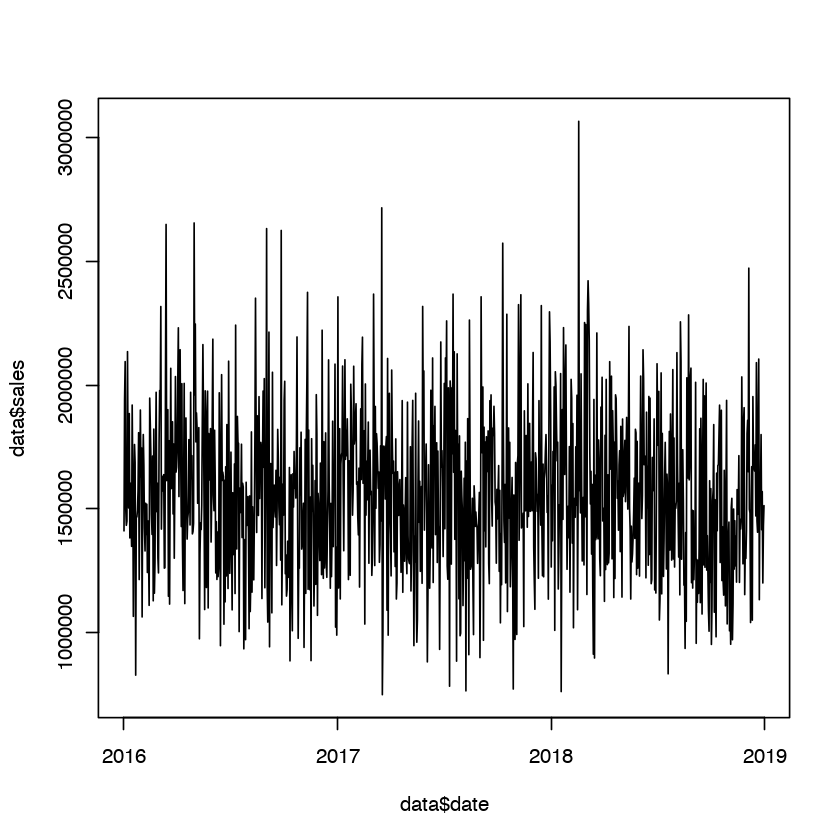

In [3]:
plot(data$date, data$sales, type='l')

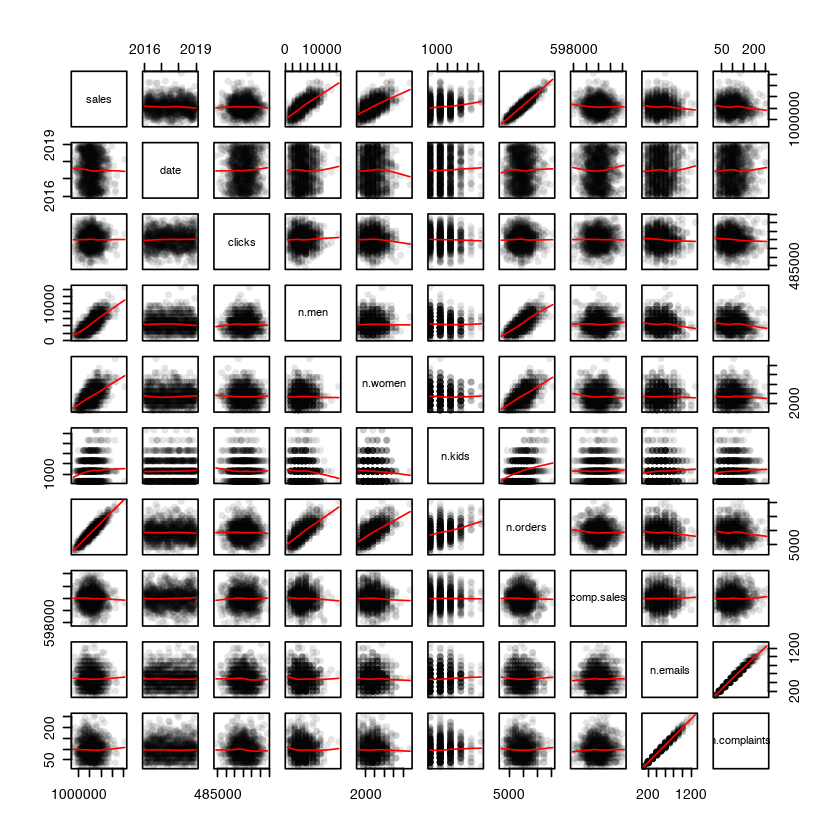

In [4]:
pairs(data, pch=16, col=rgb(0, 0, 0, 0.1), panel='panel.smooth')

In [5]:
library(mgcv)

Loading required package: nlme
This is mgcv 1.8-23. For overview type 'help("mgcv-package")'.


In [6]:
gmod <- gam(sales ~ s(as.numeric(dates)), data, family='gaussian')

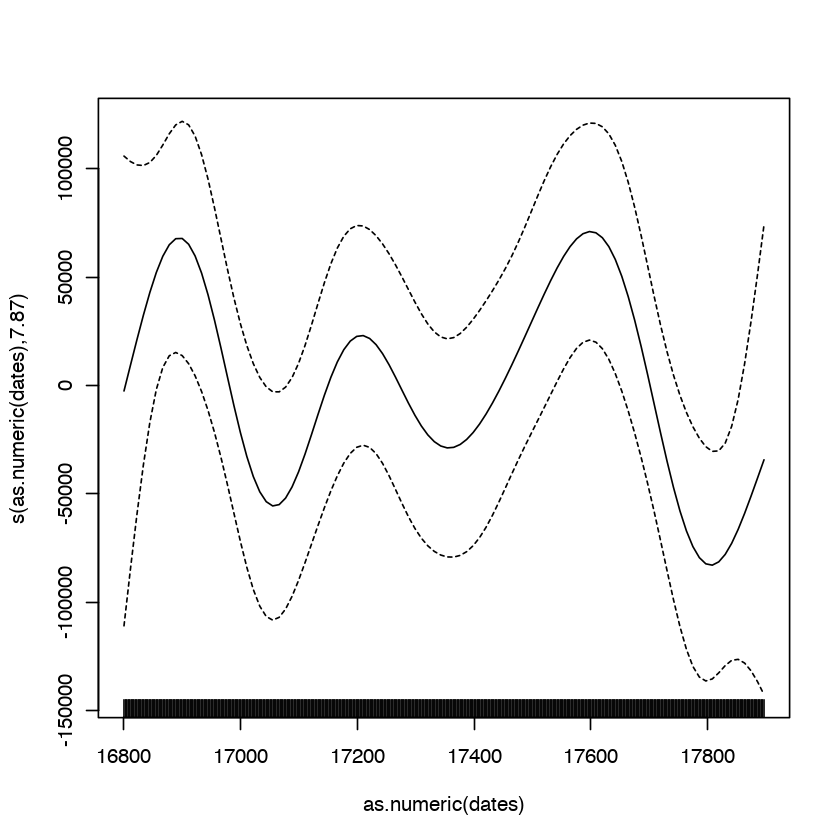

In [7]:
plot(gmod)

In [8]:
library(lubridate)


Attaching package: ‘lubridate’

The following object is masked from ‘package:base’:

    date



In [9]:
dates <- as.Date(dates,'%Y-%m-%d')

In [10]:
data$year <- as.numeric(format(dates,'%Y'))
data$month <- as.numeric(format(dates,'%m'))

In [11]:
data$doy <- yday(dates)

In [90]:
library(ggplot2)

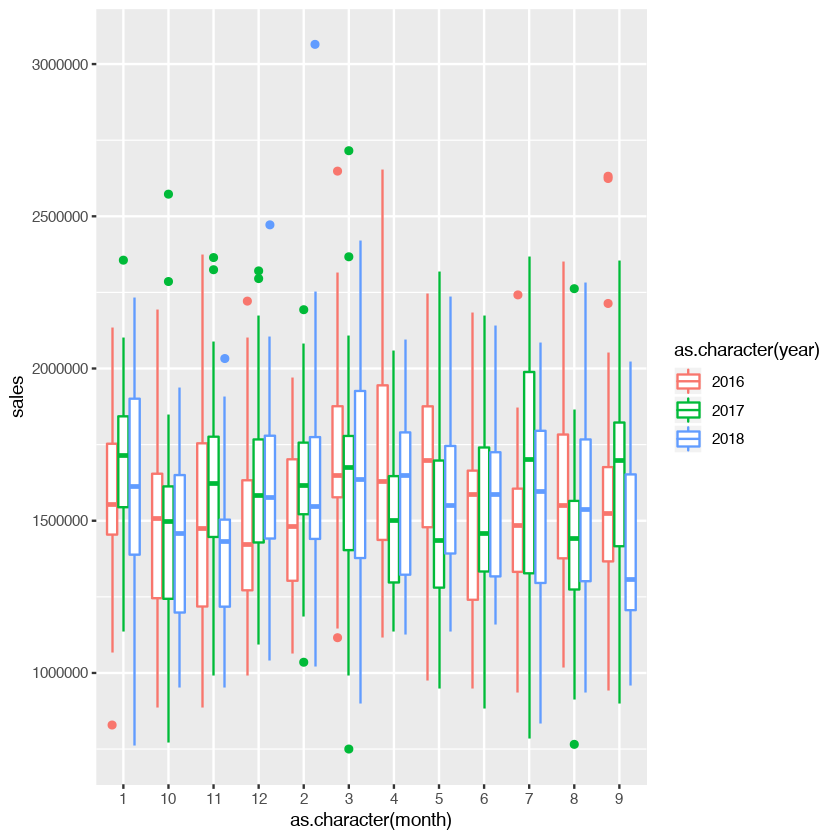

In [13]:
ggplot(data, aes(as.character(month), sales))+geom_boxplot(aes(color=as.character(year)))

In [33]:
predicted <- floor(runif(12, min=5000000, max=9000000))

In [34]:
predicted

[1] 5266973 5440571 8603244 6188043 7797843 5012564 8330937 8466827 6834962
[10] 5888732 7199652 8319422

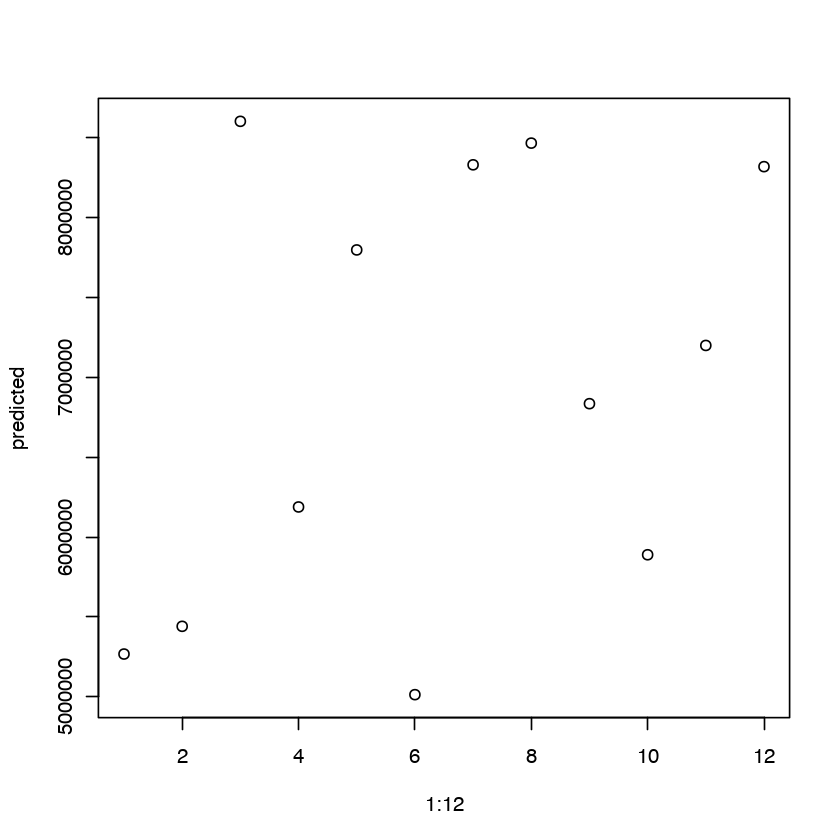

In [35]:
plot(1:12, predicted)

In [63]:
observed <- c(predicted[1:6] + floor(runif(6, min=-80000, max=80000)), 
              predicted[7:8]-floor(runif(2, min=100000, max=900000)), rep(NA, 4))

In [59]:
observed

[1] 5337196 5398809 8536822 6152079 7875833 5026665 4134800 5789344      NA
[10]      NA      NA      NA

In [66]:
out <- "/Users/dongmeichen/Documents/all/jobs/Cascade_Data_Labs/"

In [65]:
png(paste0(out, "sales.png"), width=8, height=6, units="in", res=300)
plot(1:12, predicted, xlab='Fiscal month', ylab='Sales ($)', pch=16, 
     main='NIKEiD Sales Analysis', ylim = range(na.omit(c(predicted, observed))))
lines(1:12, predicted, lwd=1.5)
points(1:12, observed, col='red', pch=16)
lines(1:12, observed, col='red', lwd=1.5)
legend("bottomright", legend = c("Predicted", "Observed"), pch = c(16, 16), lty = c(1, 1), 
       col=c('black', 'red'))
dev.off()

pdf 
  2

In [14]:
library(rgdal)

Loading required package: sp
rgdal: version: 1.2-18, (SVN revision 718)
 Geospatial Data Abstraction Library extensions to R successfully loaded
 Loaded GDAL runtime: GDAL 2.1.3, released 2017/20/01
 Path to GDAL shared files: /Library/Frameworks/R.framework/Versions/3.4/Resources/library/rgdal/gdal
 GDAL binary built with GEOS: FALSE 
 Loaded PROJ.4 runtime: Rel. 4.9.3, 15 August 2016, [PJ_VERSION: 493]
 Path to PROJ.4 shared files: /Library/Frameworks/R.framework/Versions/3.4/Resources/library/rgdal/proj
 Linking to sp version: 1.2-7 


In [39]:
states <- readOGR(dsn='/Users/dongmeichen/Documents/All/jobs/Cascade_Data_Labs',
                 layer='continental_us_states')

OGR data source with driver: ESRI Shapefile 
Source: "/Users/dongmeichen/Documents/All/jobs/Cascade_Data_Labs", layer: "continental_us_states"
with 49 features
It has 14 fields
Integer64 fields read as strings:  ALAND AWATER 


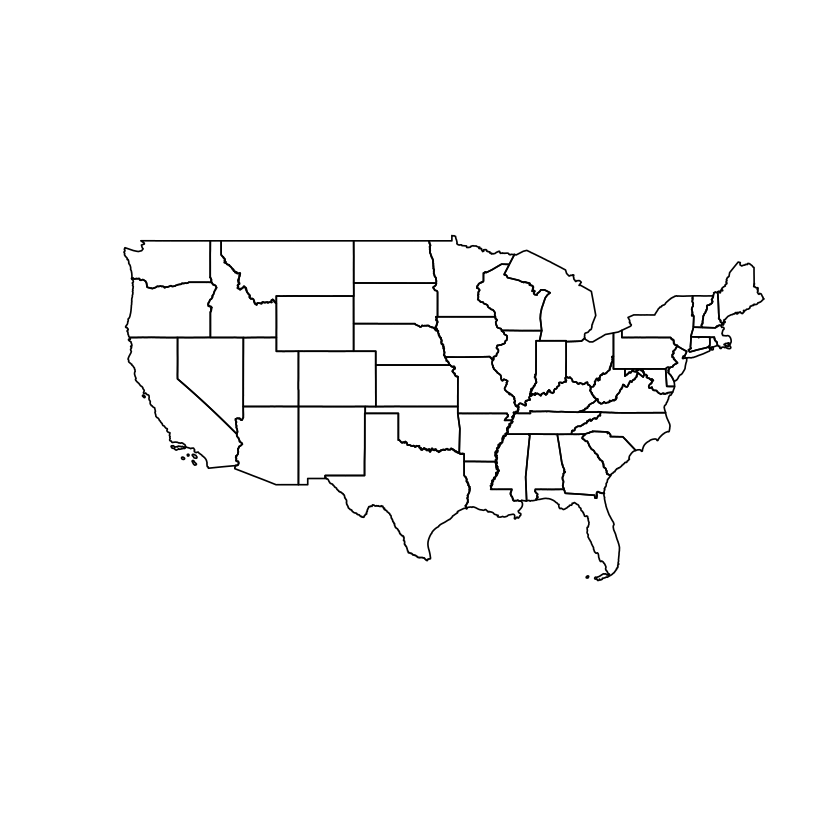

In [16]:
plot(states)

In [23]:
library(raster)


Attaching package: ‘raster’

The following object is masked from ‘package:nlme’:

    getData



In [24]:
extent(states)

class       : Extent 
xmin        : -124.849 
xmax        : -66.88544 
ymin        : 24.39631 
ymax        : 49.38436 

In [17]:
head(states@data)

,REGION,DIVISION,STATEFP,STATENS,GEOID,STUSPS,NAME,LSAD,MTFCC,FUNCSTAT,ALAND,AWATER,INTPTLAT,INTPTLON
0,3,5,54,01779805,54,WV,West Virginia,00,G4000,A,62265662566,489840834,+38.6472854,-080.6183274
1,3,5,12,00294478,12,FL,Florida,00,G4000,A,138911437206,31398800291,+28.4574302,-082.4091478
2,2,3,17,01779784,17,IL,Illinois,00,G4000,A,143784114293,6211277447,+40.1028754,-089.1526108
3,2,4,27,00662849,27,MN,Minnesota,00,G4000,A,206229176104,18944967530,+46.3158148,-094.1996628
4,3,5,24,01714934,24,MD,Maryland,00,G4000,A,25150696145,6980371026,+38.9466584,-076.6744939
5,1,1,44,01219835,44,RI,Rhode Island,00,G4000,A,2677997539,1323452846,+41.5974187,-071.5272723


In [18]:
dim(states@data)

[1] 49 14

In [20]:
state.sales.change <- round(runif(49, min=-0.9, max=0.9),2)
head(state.sales.change)

[1]  0.22 -0.49  0.74  0.62 -0.57 -0.88

In [21]:
library(RColorBrewer)
library(classInt)

Loading required package: spData
To access larger datasets in this package, install the spDataLarge
package with: `install.packages('spDataLarge',
repos='https://nowosad.github.io/drat/', type='source'))`


In [27]:
plotvar <- state.sales.change
nclr <- 8
plotclr <- brewer.pal(nclr,"PiYG")
class <- classIntervals(plotvar, nclr, style="quantile")
colcode <- findColours(class, plotclr)

In [47]:
png(paste0(out, "states.png"), width=8, height=6, units="in", res=300)
par(mfrow=c(1,1),mar=c(0.5,0,2,0))
plot(states, col=colcode)
title(main="Sales change rates between the last two fiscal months \nand the same-period historical mean", line = -1.5)
legend(-78,35, legend=names(attr(colcode, "table")),
    fill=attr(colcode, "palette"), cex=1.2, bty="n")
dev.off()

pdf 
  2

In [51]:
varnms <- c('clicks', 'n.men', 'n.women', 'n.kids', 'comp.sales', 'n.complaints')
names <- c('Number of web clicks', 'Number of men shoes sold', 'Number of women shoes sold',
          'Number of kids shoes sold', 'Competitors sales', 'Number of complaints')

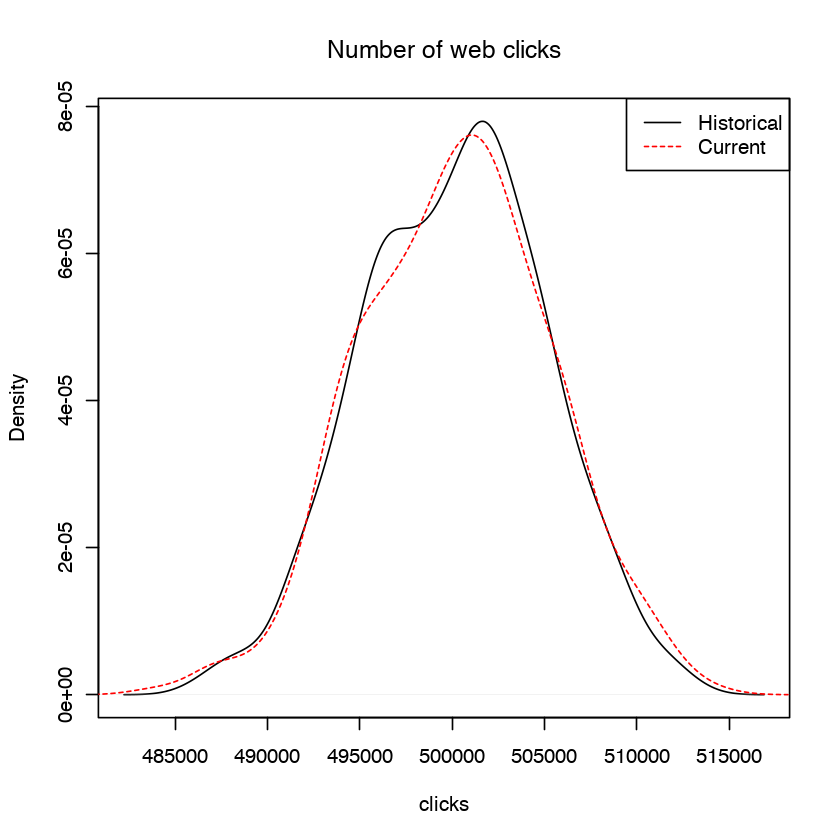

In [56]:
i <- 3
plot(density(data[data$year != 2018,i]), main=names[which(varnms==names(data)[i])],
     xlab=names(data)[i])
lines(density(data[data$year == 2018,i]), col='red', lty=2)
legend('topright', c('Historical', 'Current'), col=c('black', 'red'), lty=c(1,2))

In [77]:
png(paste0(out, "density.png"), width=8, height=6, units="in", res=300)
par(mfrow=c(2,3),mar=c(2.5,2,2.5,0.5))
for(i in c(3:6, 8, 10)){ 
    plot(density(data[data$year != 2018,i]), main=names[which(varnms==names(data)[i])],
     xlab=names(data)[i], ylim=range(c(density(data[data$year != 2018,i])$y,
                                       density(data[data$year == 2018,i])$y)))
    lines(density(data[data$year == 2018,i]), col='red', lty=2, lwd=2)
    if(i==3){
        legend('topleft', c('Historical', 'Current'), col=c('black', 'red'), 
               lty=c(1,2), lwd=c(1, 2))
    }
}
dev.off()

pdf 
  2

In [61]:
density(data[data$year != 2018,i])


Call:
	density.default(x = data[data$year != 2018, i])

Data: data[data$year != 2018, i] (731 obs.);	Bandwidth 'bw' = 9.52

       x                y            
 Min.   : -9.56   Min.   :6.870e-07  
 1st Qu.: 64.22   1st Qu.:2.458e-04  
 Median :138.00   Median :1.898e-03  
 Mean   :138.00   Mean   :3.385e-03  
 3rd Qu.:211.78   3rd Qu.:6.274e-03  
 Max.   :285.56   Max.   :9.371e-03  

In [89]:
before <- round(rnorm(N, 500, 50))
after <- round(rnorm(N, 300, 30))
png(paste0(out, "example.png"), width=5, height=4, units="in", res=300)
par(mfrow=c(1,1),mar=c(4.5,4.5,2.5,0.5))
plot(density(before), main='Changes in the predictor distribution',
    ylim=range(c(density(before)$y,density(after)$y)),
    xlim=range(c(density(before)$x,density(after)$x)),
    xlab="Example predictor")
lines(density(after), col='red', lty=2, lwd=2)
legend('topright', c('Historical', 'Current'), col=c('black', 'red'), 
               lty=c(1,2), lwd=c(1, 2))
dev.off()

pdf 
  2

In [108]:
colors <- brewer.pal(3,"Dark2")

In [120]:
p <- ggplot(subset(data, year!=2016), aes(doy, sales))
p <- p + geom_line(aes(color=as.character(year)),alpha=.6)
p <- p + scale_color_manual(values=colors)
p <- p + labs(x='Day of year', y='Sales ($)', color='Year', 
              title = "Time-series data pattern",
             caption = "(from pseudo data)")

In [121]:
png(paste0(out, "time-series.png"), width=6, height=4, units="in", res=300)
print(p)
dev.off()

pdf 
  2